# Student Performance Analysis Using Linear Regression

## Introduction

In this project, we aim to analyze the factors affecting student performance using a linear regression model. Understanding these factors can provide valuable insights for educators and students to improve academic outcomes.

## Dataset

The dataset contains the following columns, which represent various aspects of student life and performance:

- **Hours Studied**: The number of hours a student spends studying per week.
- **Extracurricular Activities**: A binary variable indicating whether the student participates in extracurricular activities (1 for yes, 0 for no).
- **Performance Index**: A composite score that reflects the overall academic performance of the student.
- **Sleep**: The average number of hours the student sleeps per night.
- **Question Papers Practiced**: The number of question papers the student has practiced.
- **Previous Scores**: The scores obtained by the student in previous exams.

## Objective

The main objective of this analysis is to identify the key factors that influence the performance index of students. By applying linear regression, we aim to understand the relationship between these factors and predict student performance based on the given features.

## Outline

1. Data Loading and Exploration
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Building and Evaluation
6. Conclusions and Insights

Let's start by loading the dataset and exploring its structure.


In [2]:
#import necessary modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Exploration

In [4]:
#loading  data

In [5]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
#check shape

In [7]:
df.shape

(10000, 6)

In [8]:
#check datatype


In [9]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## Data preprocessing

In [10]:
#check for null values

In [11]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [12]:
#value count

In [13]:
df.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

## Exploratory Data Analysis

In [14]:
#understand the correlation of the feature

C:\Users\UCHIHA MADARA\AppData\Local\Temp\ipykernel_6724\4255287099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


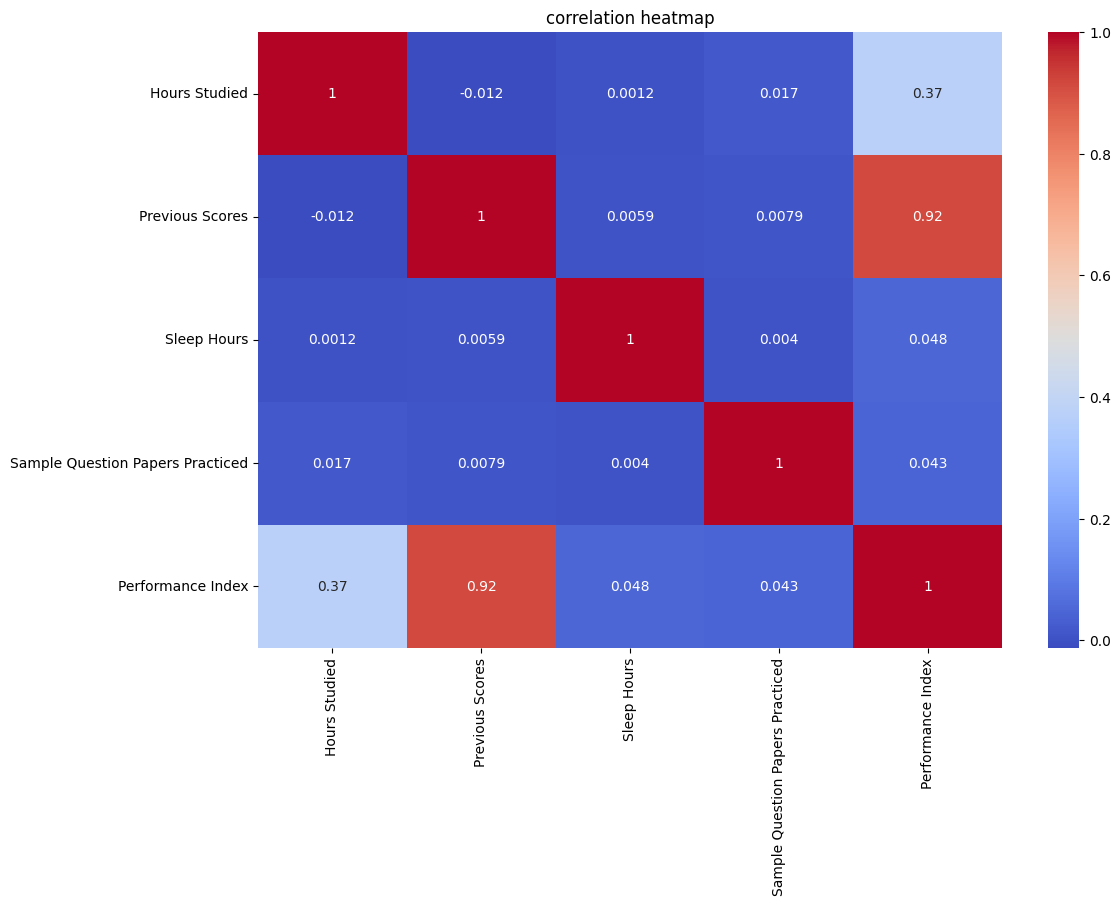

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

In [16]:
#histogram plot

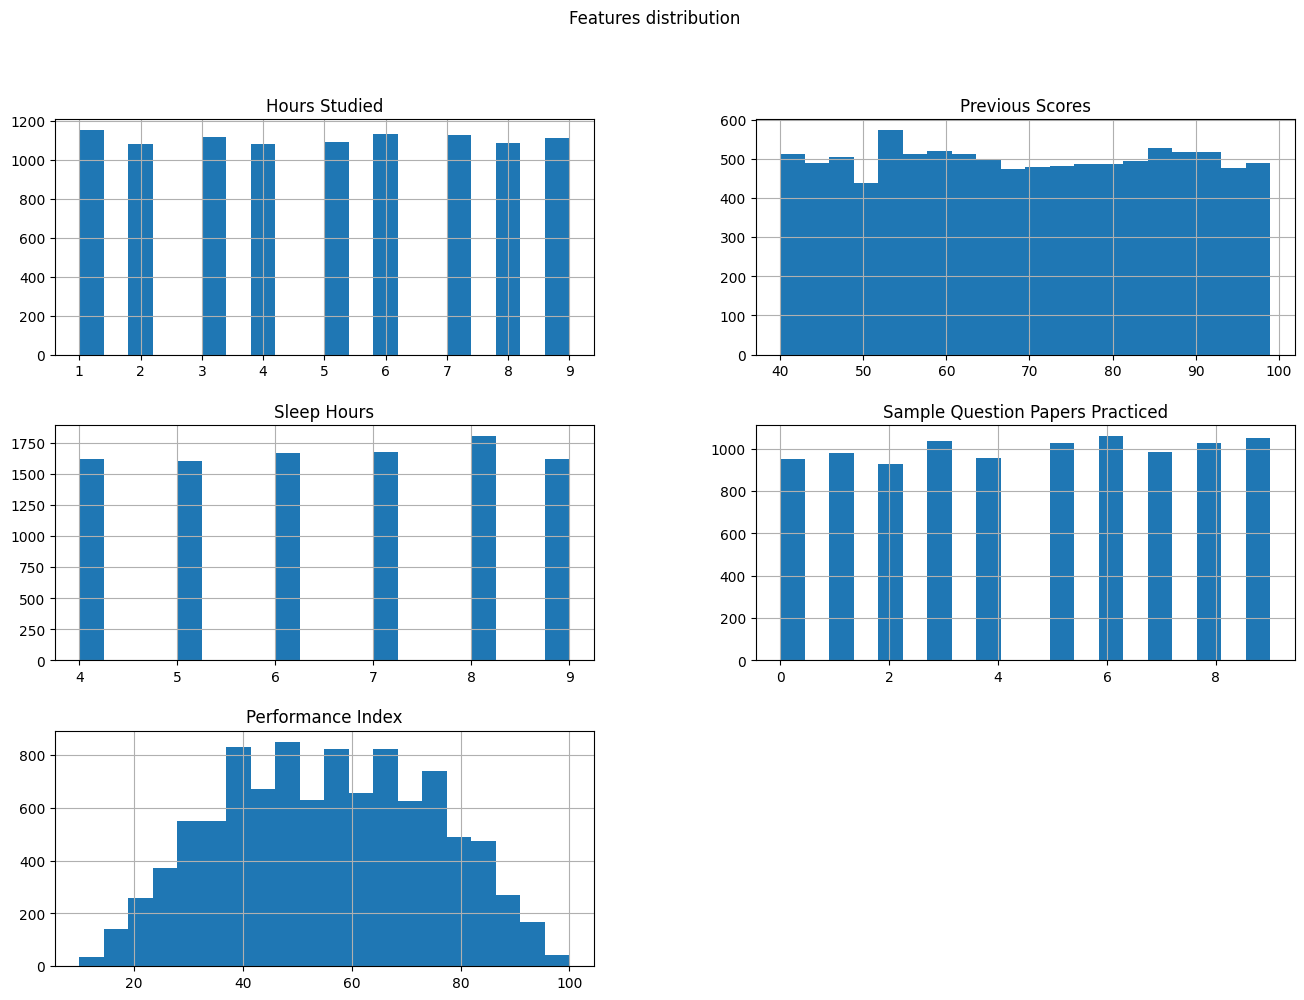

In [17]:
df.hist(bins=20, figsize=(16, 11))
plt.suptitle('Features distribution')
plt.show()

## Feature engineering

In [18]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])

In [22]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [23]:
target = df["Performance Index"]

In [24]:
features = df[["Performance Index", "Previous Scores","Extracurricular Activities",  "Sample Question Papers Practiced"]]

In [25]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
df_dropped = df.drop(['Age', 'Gender'], axis=1)

In [31]:
final_df = df.drop(["Extracurricular Activities", "Sample Question Papers Practiced"], axis=1)

In [32]:
features = df[["Performance Index", "Previous Scores",]]

In [34]:
target = df["Performance Index"]

In [35]:
X = features
y=target

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.3)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
model.score(X_test, y_test)

1.0

Since model score is 1.0 which means perfect prediction. we need to determine this is not a case of overfitting or ata leakage

In [ ]:
#check for overfitting

In [42]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test, y_test)
print(f'Training R^2 : {train_score:.2f}')
print(f'Training R^2: {test_score: .2f}')

Training R^2 : 1.00
Training R^2:  1.00
